In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

pd.set_option('display.max_columns', None)

1

In [2]:
path = 'https://stepik.org/media/attachments/lesson/779914/make_it_easy.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(1258, 4)


feature_1  feature_2  feature_3 label
0        2.5       0.00         58     B
1        2.5       0.02         61     B
2        2.5       0.05         33     B
3        2.5       0.07         89     B
4        2.5       0.10         58     B

In [3]:
display(df.describe())
display(df.describe(include=['object']))

feature_1    feature_2    feature_3
count  1258.000000  1258.000000  1258.000000
mean      0.002432    -0.000199    50.675676
std       1.602289     1.600537    28.462619
min      -2.500000    -2.500000     0.000000
25%      -1.560000    -1.560000    26.000000
50%       0.000000     0.000000    50.000000
75%       1.567500     1.560000    75.750000
max       2.500000     2.500000    99.000000

label
count   1258
unique     2
top        B
freq     629

In [4]:
df.nunique()

feature_1    491
feature_2    485
feature_3    100
label          2
dtype: int64

In [5]:
sns.pairplot(
    df,
    vars=['feature_1', 'feature_2', 'feature_3'],
    corner=True,
    hue='label',
);

/Users/imushkin/Documents/CompetitiveML/Cars/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/imushkin/Documents/CompetitiveML/Cars/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

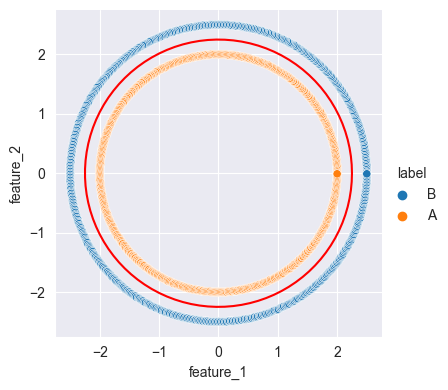

In [6]:
ax = plt.figure()
g = sns.relplot(
    data=df,
    x='feature_1',
    y='feature_2',
    hue='label',
    height=4,
    kind='scatter',
    aspect=1
)
t = np.linspace(0,2*np.pi, 100)
R = df[df['label'] == 'A']['feature_1'].max() + \
    (df[df['label'] == 'B']['feature_1'].max() - df[df['label'] == 'A']['feature_1'].max()) / 2
plt.plot(R * np.cos(t), R * np.sin(t), color='red')
plt.show()

In [7]:
print(f'Радиус {R}')

Радиус 2.25


In [8]:
df['killer_feature'] = ((df['feature_1'] ** 2 + df['feature_2'] ** 2) <= 2.25 ** 2).astype(int)
df.head()

feature_1  feature_2  feature_3 label  killer_feature
0        2.5       0.00         58     B               0
1        2.5       0.02         61     B               0
2        2.5       0.05         33     B               0
3        2.5       0.07         89     B               0
4        2.5       0.10         58     B               0

In [9]:
df.groupby('killer_feature')['label'].unique()

killer_feature
0    [B]
1    [A]
Name: label, dtype: object

2

In [33]:
path = 'https://stepik.org/media/attachments/lesson/779914/make_gold_features_example.csv'
tmp = pd.read_csv(path)
print(tmp.shape)
tmp['ride_date'] = pd.to_datetime(tmp['ride_date'].map(lambda x: f'2020-{x}'))
tmp.sort_values(by='ride_date', inplace=True)
tmp.head()

(460, 5)


deviation_normal  ride_date car_id  value  diff_value
0                   0 2020-01-01   G115   -1.5         0.0
92                  2 2020-01-01   G-29    0.0         0.0
184                -3 2020-01-01   M-30   -2.5         0.0
276                 0 2020-01-01   b468    0.0         0.0
368                 0 2020-01-01   d-21    0.0         0.0

/Users/imushkin/Documents/CompetitiveML/Cars/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


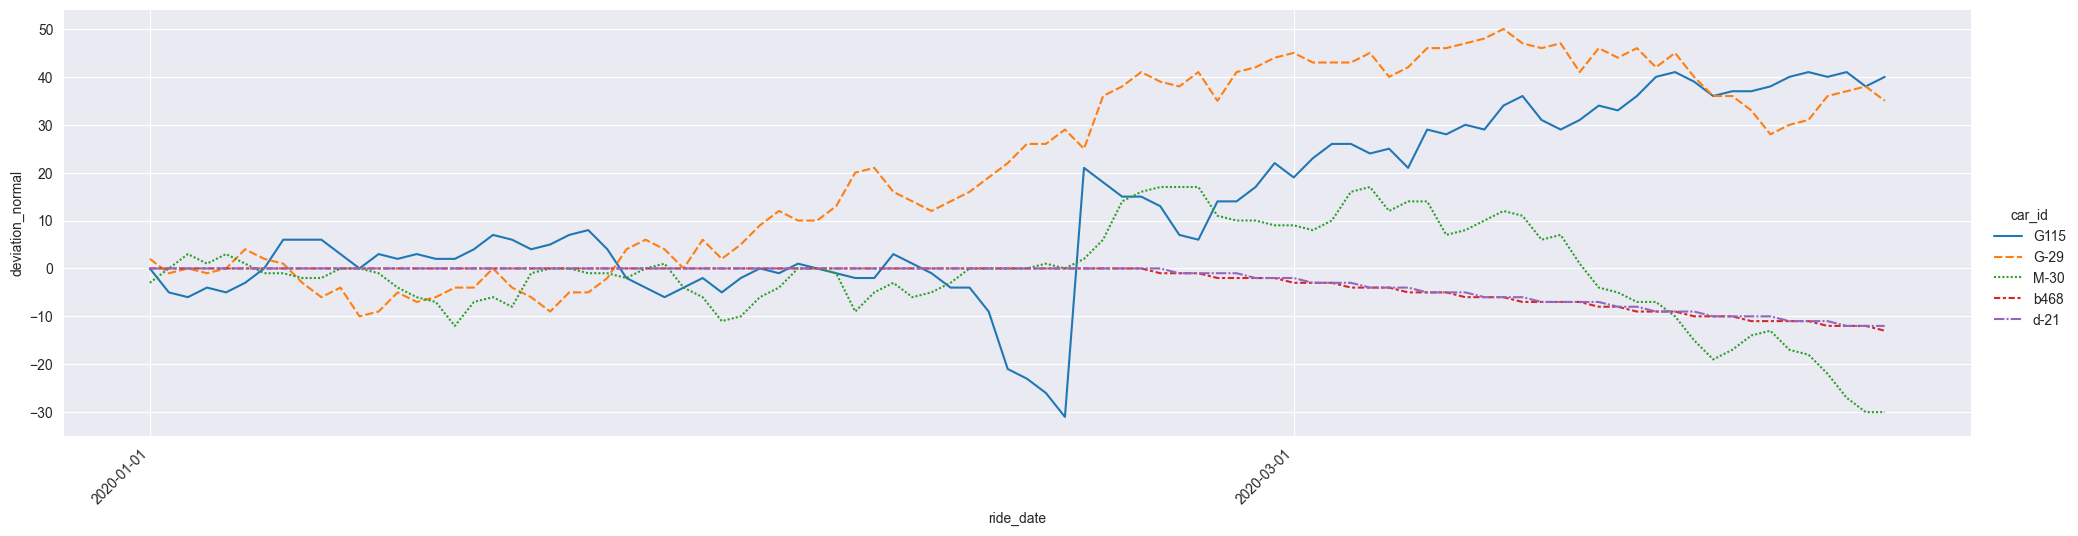

In [34]:
g = sns.relplot(
    data=tmp,
    kind="line",
    x="ride_date",
    y="deviation_normal",  # user_ride_quality
    hue="car_id",
    aspect=4,
    style="car_id",
    legend=True,
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=4);

In [41]:
grp = tmp.groupby(by=['car_id', 'ride_date'], as_index=False)['deviation_normal'].mean()
grp['deviation_normal_diff'] = grp.groupby(by=['car_id'])['deviation_normal'].diff().apply(lambda x: x if x >= 5 else 0)
grp['point_num'] = grp.groupby(by=['car_id']).cumcount()
grp.set_index('point_num', inplace=True)
result = grp.groupby('car_id', as_index=False) \
            .agg(gold_feature_1=('deviation_normal_diff', 'max'),
                 gold_feature_2=('deviation_normal_diff', 'idxmax'))
result

car_id  gold_feature_1  gold_feature_2
0   G-29            11.0              50
1   G115            52.0              49
2   M-30             8.0              51
3   b468             0.0               0
4   d-21             0.0               0

3

In [3]:
path = 'https://stepik.org/media/attachments/lesson/779914/fen_train.csv'
train = pd.read_csv(path)
print(train.shape)
train.head()

(654, 130)


signal_id        p1        p2        p3        p4        p5        p6  \
0          3 -0.177789 -0.081874 -0.096131 -0.099436 -0.098867 -0.105427   
1          4  0.010337  0.010733  0.117607  0.259589  0.339589  0.329296   
2          5 -0.221846 -0.247773 -0.187847 -0.181616 -0.108799 -0.099480   
3          6  0.411835  0.513823  0.558802  0.380244  0.210830  0.174093   
4          7  0.221770 -0.026863 -0.249447 -0.340728 -0.288676 -0.207364   

         p7        p8        p9       p10       p11       p12       p13  \
0 -0.083472 -0.074000 -0.065275 -0.061691 -0.055403 -0.027457  0.021470   
1  0.281260  0.115658 -0.172955 -0.247284 -0.046235  0.180606  0.339187   
2 -0.083244 -0.054944 -0.100919 -0.067735 -0.033171  0.020534  0.098203   
3  0.102772 -0.051933 -0.237179 -0.245491 -0.156017 -0.114517 -0.042497   
4 -0.155768 -0.091768 -0.119012 -0.149473 -0.110825 -0.129441 -0.123411   

        p14       p15       p16       p17       p18       p19       p20  \
0  0.088326  0.112959  0.093447  0.063913  0.042531  0.096395  0.219557   
1  0.354107  0.178707 -0.037314 -0.154010 -0.180714 -0.196098 -0.230856   
2  0.100447  0.117654  0.130050  0.176428  0.203356  0.082383 -0.005927   
3 -0.062140 -0.157869 -0.200356 -0.250212 -0.246478 -0.175864 -0.130537   
4 -0.099950 -0.091798 -0.028572 -0.019888 -0.027097  0.023139  0.056621   

        p21       p22       p23       p24       p25       p26       p27  \
0  0.304028  0.260561  0.080380 -0.143599 -0.192048  0.046127  0.297404   
1 -0.253281 -0.308039 -0.363084 -0.330793 -0.286786 -0.209886 -0.082041   
2  0.018878  0.105499  0.283279  0.496682  0.511385  0.295341  0.109208   
3 -0.082271 -0.074186 -0.096616 -0.074295 -0.055786  0.013231  0.113443   
4  0.101961  0.114579  0.072499  0.071494  0.149083  0.303639  0.380830   

        p28       p29       p30       p31       p32       p33       p34  \
0  0.313948  0.164006 -0.053661 -0.214979 -0.220708 -0.188327 -0.218604   
1  0.024760  0.181498  0.349013  0.406222  0.365960  0.360653  0.501660   
2 -0.108785 -0.360003 -0.385937 -0.316397 -0.305872 -0.271552 -0.214470   
3  0.108573  0.031093  0.003024  0.168762  0.359044  0.259146  0.018830   
4  0.247005  0.024564 -0.124940 -0.107502  0.060683  0.222007  0.246909   

        p35       p36       p37       p38       p39       p40       p41  \
0 -0.243770 -0.258029 -0.266871 -0.205018 -0.162441 -0.180579 -0.142955   
1  0.560137  0.237410 -0.309301 -0.514757 -0.185332  0.101837  0.054087   
2 -0.210354 -0.229402 -0.216646 -0.221506 -0.179793 -0.060139  0.084495   
3 -0.130248 -0.129096 -0.006340  0.131929  0.372699  0.559614  0.453687   
4  0.142247 -0.004899 -0.129201 -0.184789 -0.203457 -0.278482 -0.319511   

        p42       p43       p44       p45       p46       p47       p48  \
0 -0.034747  0.129129  0.304290  0.382479  0.319986  0.247369  0.266184   
1 -0.063666 -0.192944 -0.310179 -0.335047 -0.266855 -0.091026  0.023069   
2  0.249275  0.311192  0.302129  0.359791  0.394029  0.349372  0.315958   
3  0.328783  0.106332 -0.266063 -0.358014 -0.374761 -0.420401 -0.290046   
4 -0.287739 -0.295944 -0.265062 -0.203372 -0.190136 -0.120577 -0.008328   

        p49       p50       p51       p52       p53       p54       p55  \
0  0.245455  0.217625  0.223898  0.097127 -0.180365 -0.481119 -0.481001   
1 -0.021557 -0.047413 -0.048495 -0.084869 -0.044988  0.024234  0.005607   
2  0.263302  0.071311 -0.143681 -0.198872 -0.129502 -0.071799 -0.086518   
3 -0.270166 -0.310168 -0.287223 -0.318782 -0.249234 -0.129209 -0.027465   
4  0.106173  0.231956  0.320220  0.353816  0.331760  0.317496  0.323275   

        p56       p57       p58       p59       p60       p61       p62  \
0 -0.249051 -0.158163 -0.021063  0.003185 -0.144767 -0.051378 -0.081152   
1  0.003977  0.026201 -0.017051 -0.025074  0.033110  0.152710  0.336142   
2 -0.092490 -0.111115 -0.183417 -0.218011 -0.235821 -0.218765 -0.145296   
3  0.149563  0.312352  0.402989  0.426318  0.426675  0.334166  0.161675   
4  0.298617  0

In [4]:
# Переводим датасет в long формат
df_melt = train.melt(
    id_vars="signal_id",
    value_vars=[f"p{i}" for i in range(1, 128 + 1)],
    var_name="orders",
    value_name="value",
).merge(train[["signal_id", "label"]], on="signal_id", how="left")
print(df_melt.shape)
df_melt.head()

(83712, 4)


signal_id orders     value  label
0          3     p1 -0.177789      0
1          4     p1  0.010337      0
2          5     p1 -0.221846      0
3          6     p1  0.411835      0
4          7     p1  0.221770      0

/Users/imushkin/Documents/CompetitiveML/Cars/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


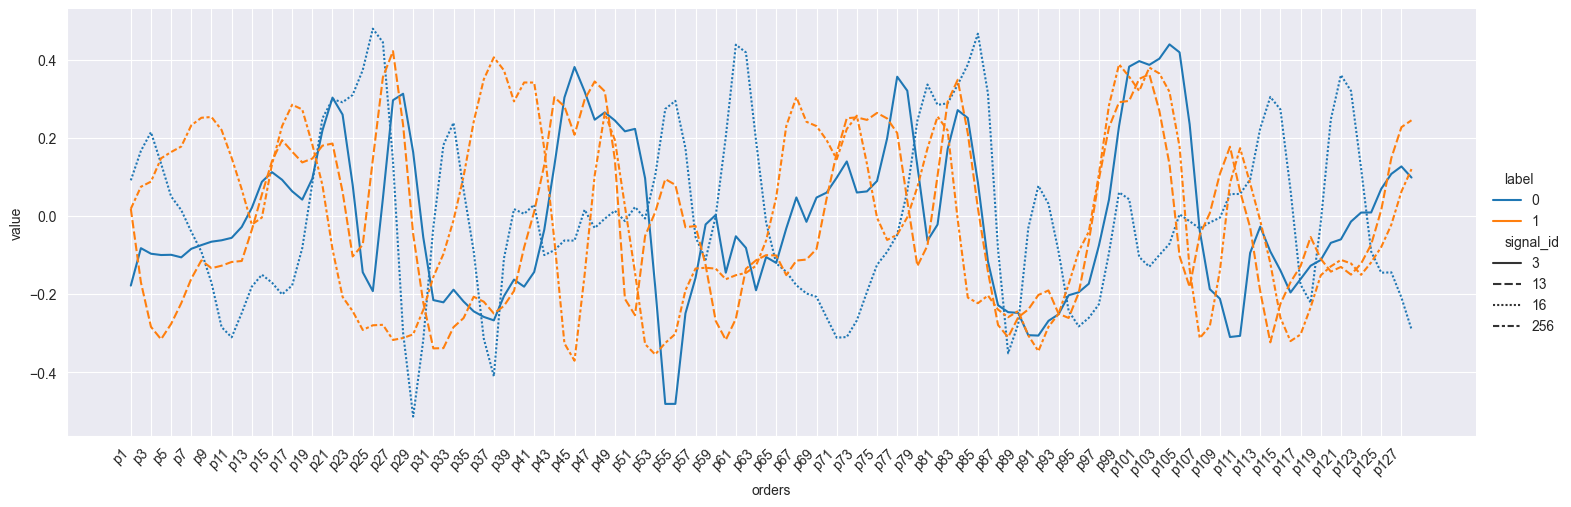

In [21]:
# Отбираем несколько примеров разных классов
tmp = df_melt[df_melt.signal_id.isin([3, 13, 16, 256])]
#tmp = df_melt[df_melt.signal_id.isin([3, 256])]

# Строим графику
sns.relplot(
    data=tmp,
    x="orders",
    y="value",
    hue="label",
    style="signal_id",
    kind="line",
    aspect=3,
).set_xticklabels(rotation=45, horizontalalignment="right", step=2);

In [112]:
my_func_1 = lambda x: (abs(x.diff().dropna()) <= 0.05).sum()
my_func_2 = lambda x: (x.diff().dropna() ** 2).sum()

grp = df_melt.groupby(by=['signal_id']) \
             .agg(val=('value', my_func_1),
                  disp=('value', my_func_2),
                  label=('label', 'first'))
grp.head(2)

val      disp  label
signal_id                      
3           70  1.341957      0
4           48  2.561699      0

/Users/imushkin/Documents/CompetitiveML/Cars/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


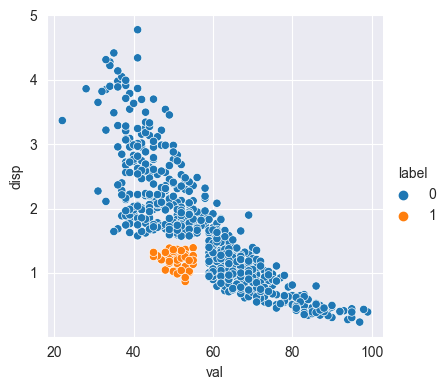

In [113]:
g = sns.relplot(
    data=grp,
    x='val',
    y='disp',
    hue='label',
    height=4,
    kind='scatter',
    aspect=1
)

In [114]:
print(grp[grp['label'] == 1]['disp'].max(), grp[grp['label'] == 1]['val'].max())

1.3908046824467561 55


/Users/imushkin/Documents/CompetitiveML/Cars/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

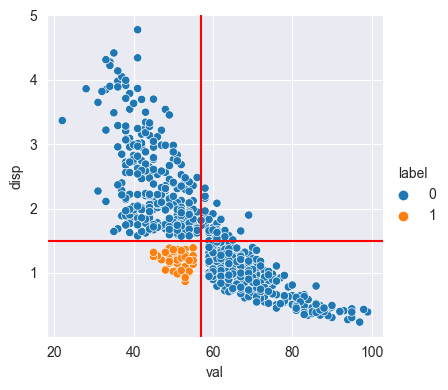

In [120]:
plt.figure()
g = sns.relplot(
    data=grp,
    x='val',
    y='disp',
    hue='label',
    height=4,
    kind='scatter',
    aspect=1
)
plt.axvline(57, color='red')
plt.axhline(1.5, color='red')
plt.show()

In [121]:
path = 'https://stepik.org/media/attachments/lesson/779914/fen_test.csv'
test = pd.read_csv(path)
print(test.shape)
test.head()

(432, 129)


signal_id        p1        p2        p3        p4        p5        p6  \
0          0  0.048383  0.075671  0.085861  0.087598  0.133466  0.239305   
1          1  0.092534  0.209535  0.390794  0.442508  0.429571  0.451524   
2          8  0.045240  0.182892  0.293203  0.367133  0.341595  0.315698   
3          9  0.182414 -0.337581 -0.080484  0.393137  0.373783  0.112220   
4         10  0.378236  0.137916 -0.063737 -0.201264 -0.067326  0.127712   

         p7        p8        p9       p10       p11       p12       p13  \
0  0.324572  0.264262  0.129173  0.041845  0.023816  0.040370  0.040041   
1  0.310780 -0.075440 -0.297661 -0.200500 -0.071082  0.021172  0.098151   
2  0.343855  0.301613  0.243359  0.187389  0.015613 -0.196952 -0.302444   
3 -0.219613 -0.355965 -0.302890 -0.435464 -0.351440 -0.225193 -0.336368   
4  0.221648  0.257548  0.093588 -0.119932 -0.278199 -0.391866 -0.351414   

        p14       p15       p16       p17       p18       p19       p20  \
0  0.139013  0.261580  0.181927  0.047631 -0.057256 -0.151566 -0.189972   
1  0.042815 -0.071777 -0.153530 -0.302678 -0.340163 -0.227110 -0.199090   
2 -0.280813 -0.203568 -0.123386 -0.065479 -0.083106 -0.113229 -0.115783   
3 -0.218339 -0.203639 -0.218905 -0.041788  0.014533  0.168182  0.219674   
4 -0.299622 -0.245171 -0.178685 -0.216023 -0.220508 -0.215797 -0.217145   

        p21       p22       p23       p24       p25       p26       p27  \
0 -0.286134 -0.358912 -0.336984 -0.347042 -0.316520 -0.230247 -0.165906   
1 -0.129994 -0.091252 -0.160966 -0.136444 -0.118603 -0.080942 -0.000069   
2 -0.155811 -0.157373 -0.097397 -0.051194 -0.034559 -0.047888 -0.022081   
3  0.137675  0.193452  0.244919  0.340750  0.299889  0.219507  0.325322   
4 -0.125845 -0.013280  0.141285  0.280821  0.332502  0.366242  0.394570   

        p28       p29       p30       p31       p32       p33       p34  \
0 -0.093753  0.016184  0.129593  0.166711  0.247143  0.371021  0.348786   
1 -0.010979 -0.001597  0.049917  0.128433  0.204597  0.223463  0.334648   
2  0.045545  0.107248  0.136680  0.084031  0.037957  0.038227  0.081499   
3  0.430303  0.585287  0.549210  0.189640 -0.133672 -0.323921 -0.459242   
4  0.437678  0.437264  0.306834  0.048976 -0.219374 -0.294224 -0.217671   

        p35       p36       p37       p38       p39       p40       p41  \
0  0.380728  0.470429  0.351942  0.170077 -0.039598 -0.285537 -0.331614   
1  0.441296  0.285954  0.101239  0.160984  0.186168  0.110894  0.149332   
2  0.245453  0.372796  0.293841  0.086635 -0.106997 -0.151955 -0.065951   
3 -0.602965 -0.616034 -0.524857 -0.531776 -0.485683 -0.438548 -0.468083   
4 -0.141841 -0.064463 -0.023022 -0.089580 -0.201142 -0.264887 -0.273684   

        p42       p43       p44       p45       p46       p47       p48  \
0 -0.251793 -0.205820 -0.160900 -0.134275 -0.142600 -0.152690 -0.149235   
1  0.082826 -0.046658 -0.081519 -0.217724 -0.263930 -0.177726 -0.198617   
2  0.056136  0.228227  0.295696  0.117572 -0.046554 -0.103596 -0.171034   
3 -0.372675 -0.080413  0.246321  0.281015  0.336399  0.587008  0.488643   
4 -0.208932 -0.124803 -0.084820 -0.053207 -0.074278 -0.114140 -0.109986   

        p49       p50       p51       p52       p53       p54       p55  \
0 -0.149163 -0.132313 -0.073264 -0.014668  0.014802  0.027230  0.049057   
1 -0.198042 -0.190321 -0.226478 -0.198240 -0.173630 -0.165751 -0.143115   
2 -0.216963 -0.257050 -0.245416 -0.251215 -0.296808 -0.235324 -0.231473   
3  0.414380  0.531207  0.276200 -0.092698 -0.283937 -0.087795  0.253937   
4 -0.099453 -0.030625  0.068385  0.115854  0.147951  0.191072  0.211816   

        p56       p57       p58       p59       p60       p61       p62  \
0  0.061000  0.068280  0.106870  0.100942  0.061844  0.074604  0.150963   
1 -0.115826 -0.038400  0.023541  0.025118  0.092202  0.250972  0.368615   
2 -0.230388 -0.084296  0.076247  0.201649  0.220418  0.276206  0.368699   
3  0.073975 -0.121013 -0.203813 -0.412805 -0.299760 -0.241480 -0.301405   
4  0.198927  0

In [122]:
# Переводим датасет в long формат
df_melt = test.melt(
    id_vars="signal_id",
    value_vars=[f"p{i}" for i in range(1, 128 + 1)],
    var_name="orders",
    value_name="value",
).merge(train[["signal_id", "label"]], on="signal_id", how="left")
print(df_melt.shape)
df_melt.head()

(55296, 4)


signal_id orders     value  label
0          0     p1  0.048383    NaN
1          1     p1  0.092534    NaN
2          8     p1  0.045240    NaN
3          9     p1  0.182414    NaN
4         10     p1  0.378236    NaN

In [124]:
my_func_1 = lambda x: (abs(x.diff().dropna()) <= 0.05).sum()
my_func_2 = lambda x: (x.diff().dropna() ** 2).sum()

grp = df_melt.groupby(by=['signal_id'], as_index=False) \
             .agg(val=('value', my_func_1),
                  disp=('value', my_func_2),
                  label=('label', 'first'))
grp['label'] = ((grp['disp'] < 1.5) & (grp['val'] < 57)).astype(int)
grp.head()

signal_id  val      disp  label
0          0   65  1.056436      0
1          1   55  1.615065      0
2          8   55  1.170554      1
3          9   35  3.405041      0
4         10   47  1.636266      0

In [125]:
grp[['signal_id', 'label']].to_csv('../subs/3_2_hw_step_11.csv', index=False)